# This notebook will be mainly used for the capstone project _ IBM Data Science Certification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


In [2]:
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


Pincodes in Toronto
website url : https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M_.text

In [3]:
import requests
from bs4 import BeautifulSoup

In [4]:
url  = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')

In [5]:
soup= BeautifulSoup(url.text,'html.parser')


In [6]:
pincode_table=soup.find_all('table',{'class':'wikitable sortable'})


In [7]:
soup.title.string

'List of postal codes of Canada: M - Wikipedia'

In [8]:
import pandas as pd
df=pd.read_html(str(pincode_table))
print(df)

[    Postal Code           Borough  \
0           M1A      Not assigned   
1           M2A      Not assigned   
2           M3A        North York   
3           M4A        North York   
4           M5A  Downtown Toronto   
..          ...               ...   
175         M5Z      Not assigned   
176         M6Z      Not assigned   
177         M7Z      Not assigned   
178         M8Z         Etobicoke   
179         M9Z      Not assigned   

                                         Neighbourhood  
0                                         Not assigned  
1                                         Not assigned  
2                                            Parkwoods  
3                                     Victoria Village  
4                            Regent Park, Harbourfront  
..                                                 ...  
175                                       Not assigned  
176                                       Not assigned  
177                                      

# Question: Week 3



The dataframe will consist of three columns: PostalCode, Borough, and Neighborhood
Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned.
More than one neighborhood can exist in one postal code area. For example, in the table on the Wikipedia page, you will notice that M5A is listed twice and has two neighborhoods: Harbourfront and Regent Park. These two rows will be combined into one row with the neighborhoods separated with a comma as shown in row 11 in the above table.
If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough.
Clean your Notebook and add Markdown cells to explain your work and any assumptions you are making.
In the last cell of your notebook, use the .shape method to print the number of rows of your dataframe.
 Submit a link to your Notebook on your Github repository. (10 marks)

In [9]:
wurl="https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"

In [10]:
# Header
dfx = pd.read_html(wurl, header=0)
df=dfx[0]

In [11]:
#Checking for any duplicate rows
dr_df = df[df.duplicated(['Postal Code'])]
dr_df

,Postal Code,Borough,Neighbourhood


In [12]:
#Ignore cells with a borough that is Not assigned.    
df= df[~df.Borough.str.contains("Not assigned")]

#If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough.

i=0
while df.iloc[i]['Neighbourhood']=="Not assigned":
    df.iloc[i]['Neighbourhood']==df.iloc[i]['Borough']
    df.iloc[i]['Neighbourhood']
    i+=1

df

,Postal Code,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
...,...,...,...
160,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
165,M4Y,Downtown Toronto,Church and Wellesley
168,M7Y,East Toronto,"Business reply mail Processing Centre, South C..."
169,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


In [13]:
# shape of the dataframe
df.shape

(103, 3)

In [14]:
#resetting the index from 1 to 103
df_r = df.reset_index(drop=True)
df_r

,Postal Code,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
99,M4Y,Downtown Toronto,Church and Wellesley
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C..."
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


In [15]:
# dataframe for postal code only 
PIN=df_r['Postal Code']
PIN

0      M3A
1      M4A
2      M5A
3      M6A
4      M7A
      ... 
98     M8X
99     M4Y
100    M7Y
101    M8Y
102    M8Z
Name: Postal Code, Length: 103, dtype: object

In [16]:
#importing geocoder-not used here
try:
    import geocoder
except:
    import pip
    pip.main(['install','geocoder'])
    import geocoder

In [17]:
#importing pgeocode
try:
    import pgeocode
except:
    import pip
    pip.main(['install','pgeocode'])
    import pgeocode

In [18]:
#for canada
nomi = pgeocode.Nominatim('ca')

In [19]:
#creating a data frame of postal codes and longitude and latitude

dfs = {}
for i in PIN:
    zipcode=nomi.query_postal_code(i)
    dfs[i]=zipcode
    
dfsd=pd.DataFrame.from_dict(dfs,orient='index')


In [20]:
#creating the required dataframe 
dfdsx=pd.DataFrame(dfsd, columns = ["postal_code", "longitude", "latitude"])
dfdsx.rename(columns={"postal_code": "Postal Code"},inplace=True)


In [21]:
#creating combined df

df_combined = df_r.join(dfdsx.set_index('Postal Code'), on='Postal Code')
df_combined

,Postal Code,Borough,Neighbourhood,longitude,latitude
0,M3A,North York,Parkwoods,-79.3300,43.7545
1,M4A,North York,Victoria Village,-79.3148,43.7276
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",-79.3626,43.6555
3,M6A,North York,"Lawrence Manor, Lawrence Heights",-79.4504,43.7223
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",-79.3889,43.6641
...,...,...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",-79.5076,43.6518
99,M4Y,Downtown Toronto,Church and Wellesley,-79.3830,43.6656
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C...",-79.2505,43.7804
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",-79.4939,43.6325


### Plotting the data 

In [22]:
Bou = ((df_combined.longitude.min(),  df_combined.longitude.max(),  
         df_combined.latitude.min(), df_combined.latitude.max()))

Bou

(-79.5909, -79.1564, 43.6021, 43.834)

In [23]:
import matplotlib.image as mpimg
toronto_img=mpimg.imread('/Users/.../.../map.png')



Text(0.5,0,'Longitude')

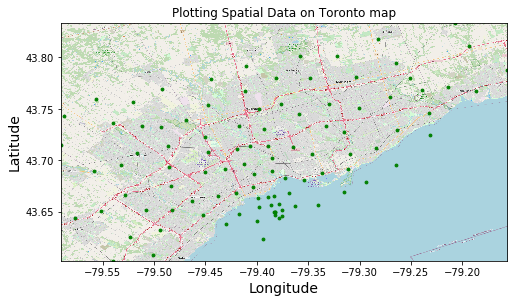

In [24]:
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(df_combined.longitude,df_combined.latitude, c='g', s=8)
ax.set_title('Plotting Spatial Data on Toronto map')
ax.set_xlim(Bou[0],Bou[1])
ax.set_ylim(Bou[2],Bou[3])
ax.imshow(toronto_img, zorder=0, extent = Bou, aspect= 'equal')
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
